In [37]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [38]:
# Mean dan std deviasi untuk normalisasi
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Fungsi custom untuk normalisasi
def custom_normalization(image):
    image = image / 255.0
    image = (image - mean) / std
    return image

In [39]:
train_data_dir = r'D:\JupyterNote\002_Notebook\dataset_roti\train'
validation_data_dir = r'D:\JupyterNote\002_Notebook\dataset_roti\validation'

In [40]:
# Persiapan dataset dan augmentasi data
image_size = (224, 224)
batch_size = 32

# ImageDataGenerator untuk augmentasi data dengan preprocessing function
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=custom_normalization
)

validation_datagen = ImageDataGenerator(
    preprocessing_function=custom_normalization
)

# Generator data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

Found 25 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


In [41]:
# Model MobileNetV3
base_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [42]:
# Membekukan lapisan dasar dari MobileNetV3
for layer in base_model.layers:
    layer.trainable = False

In [46]:
# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
# model.summary()

In [44]:
# Melatih model
num_epochs = 20
history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=validation_generator
)
# Evaluasi model
test_loss, test_accuracy = model.evaluate(validation_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/20


d:\JupyterNote\AnacondaEnv\envs\notebook_latih\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.7242 - loss: 0.6482 - val_accuracy: 0.8000 - val_loss: 0.5971
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.6617 - loss: 0.6395 - val_accuracy: 0.8000 - val_loss: 0.5808
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 965ms/step - accuracy: 0.8933 - loss: 0.5863 - val_accuracy: 0.8000 - val_loss: 0.5669
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 895ms/step - accuracy: 0.8296 - loss: 0.5693 - val_accuracy: 0.8000 - val_loss: 0.5533
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step - accuracy: 0.6883 - loss: 0.6105 - val_accuracy: 0.8000 - val_loss: 0.5397
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step - accuracy: 0.8193 - loss: 0.5762 - val_accuracy: 0.8000 - val_loss: 0.5272
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 828ms/step - accuracy: 0.8575 - loss: 0.5396 - val_accuracy: 0.8000 - val_loss: 0.5151
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 819ms/step - accuracy: 0.8042 - loss: 0.5212 - val_accuracy: 0.8400 - val_loss: 0.5033
Epoch 9/

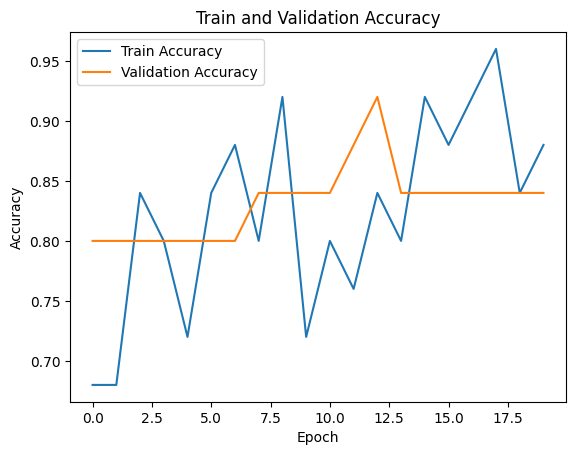

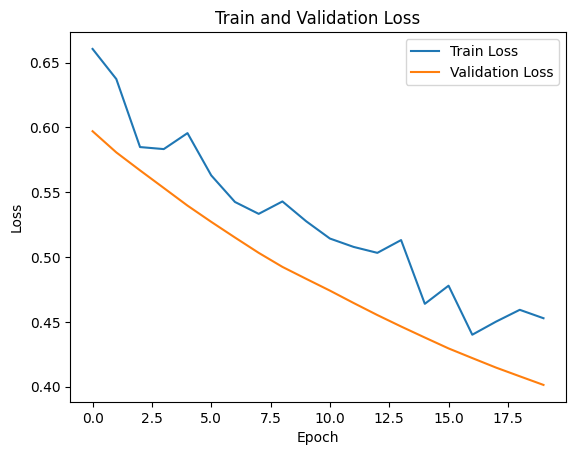

In [61]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.show()

In [64]:
model.save('model_sementara_kategori_berjamur_dan_tidak_berjamur.keras')